# Gibbs Sampling for Image Denoising:

We consider a given noisy binary image $X (X=X_{ij},X_{ij}\in \{-1,1\} \forall i,j \in \{1,2,...,N \} )$ ,and $Y$

his unknown orignial image.

Bayes's formula gives us the adavantage of  $~~~~~~~~$ $p(Y/X)=\dfrac{p(X/Y)p(Y)}{p(X)}$

where:

-$p(X)$ is the prior known distribution ($X$ is given)

-$p(X/Y)$ is the likelihood function.

-$p(Y/X)$ the posterior distribution.

So from the probabilistic inference view  ,denoising image equivalent a found $\hat Y$

with:

$~~~~~~~~$ $\hat Y=argmax\left(\dfrac{p(X/Y)p(Y)}{p(X)}\right)$

such as $p(X)$ is coxtant ,$log$ is an increasing function and $\hat Y=argmax(f) \Longleftrightarrow \hat Y=argmin(-f)$

Then the MPA estimation corresponding to:

$~~~~~~~~$ $\hat Y=argmin\left(-log(p(X/Y))-log(p(Y))\right)$

mathematically it's impossible to resolve the equation above, So we just procede an algorithm that minimize the
quantity 

$~~~~~~~~$ $\left(-log(p(X/Y))-log(p(Y))\right)$



# Markov Random Field:


Random Markov Field or for short RMF ia a graph $G=(V,E)$.

where $V$ is the set of nodes, and $E=\{(v_{i}, v_{j})\}$ with $v_{i}$ and $v_{j}$ are neighbors

take a look a the image below


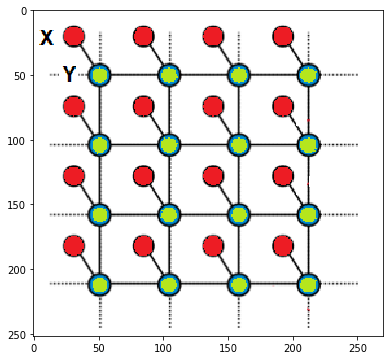

In [4]:
import numpy as np
from numpy.random import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from numba import jit # to make code more faster
from typing import Tuple, List, List, Optional
from numpy.random import random
from  skimage.io import imread
import tqdm as tq

image = imread("/home/said/Pictures/Screenshots/Screenshot from 2022-10-17 09-48-07.png")
fig, axes = plt.subplots(figsize=(10,6))
axes.imshow(image,cmap=cm.gray, aspect="equal", interpolation="none", vmin=-1, vmax=1)
inp=np.arange(np.shape(image)[0])
np.random.shuffle(inp)

it's obvious that's each node(pixel) has four neighbors (up, down, left, right), So mathematically  the neighbors of (𝑖,𝑗) are {(𝑖−1,𝑗),(𝑖+1,𝑗),(𝑖,𝑗−1),(𝑖,𝑗+1)} with some exceptionality in the cases i,j ∈{0,𝑁}.


In [4]:
from typing import List, Tuple

def neighbors(i:int,j:int)->List[Tuple]:
      return [(k,l) for k,l in zip([i-1, i, i+1, i], [j,j-1, j, j+1])]

# Energy(loss function):

The energy function (to minimize) are defined by the following expression:

$~~~~~~~~~~~~~~~~~~~~~~~$ $E(X,Y)=\zeta \sum_{i,j} X_{i,j}*X_{i\displaystyle \pm 1,j\displaystyle \pm 1} -\beta \sum_{i,j} X_{i,j}*Y_{i,j}$





Noisy Image


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

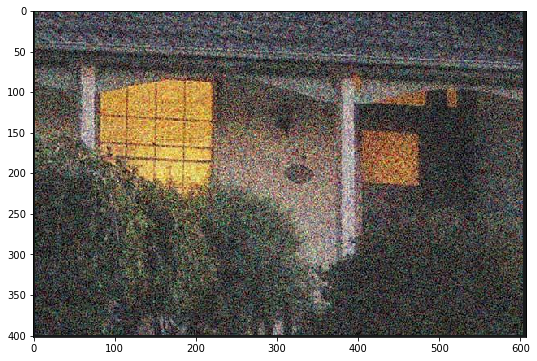

In [47]:
class Gibbs_Sampling:
    def __init__(self, X:np.array(()))->None:
        self.X=X
    
  def read_image(self, file_image:str)->None:
      image = imread(file_image)
      fig, axes = plt.subplots(figsize=(10,6))
      axes.imshow(image,cmap=cm.gray, aspect="equal", interpolation="none", vmin=-1, vmax=1)
      
  def Noisy_image( file_image:str)->None:
      X = imread(file_image)
      for i in range(np.size(X,0)):
            for j in range(np.size(X,1)):
                r=random()
                if r>0.95:
                    X[i,j]=-X[i,j]
      fig, axes = plt.subplots(figsize=(10,6))
      axes.set_title('Noisy_image')
      axes.imshow(X,cmap=cm.gray, aspect="equal", interpolation="none", vmin=-1, vmax=1)
    
  def Denoisin_image(self, noisy_image:str, niter:int, zeta:float=2.5, eta:float=1.5)->None:
       X = imread(file_image)
       Y=X.copy()
       for i in range(np.size(X,0)):
            for j in range(np.size(X,1)):
                Y[i,j]=1
                Ey=0
                for k in range(-1,1):
                    for l in range(-1,1):
                        Ey+=Y[i,j]*Y[k,l]
                E_plus=-zeta*Ey-eta*X[i,j]*Y[i,j]
                Y[i,j]=-1
                E_minus=-zeta*Ey-eta*X[i,j]*Y[i,j]
                if E_plus<E_minus:
                   Y[i,j]=1
                else:
                    Y[i,j]=-1
       fig, axes = plt.subplots(figsize=(10,6))
       axes.set_title('Noisy_image')
       axes.imshow(X,cmap=cm.gray, aspect="equal", interpolation="none", vmin=-1, vmax=1)
    
    

    
      
    
    
    
  def denosing_image(I,J,eta=2.0,zeta=1.5):
          ind =np.arange(np.shape(I)[0])
          np.random.shuffle(ind)
          orderx = ind.copy()
          np.random.shuffle(ind)
          for i in  orderx:
                for j in ind:
                   oldJ=J[i,j]
                   J[i,j]=1
                   Ea=-eta*local_energy(I, i, j)-zeta*np.sum(I*J)
                   J[i,j]=-1
                   Eb=-eta*local_energy(I, i, j)-zeta*np.sum(I*J)
                   if Ea<Eb:
                       J[i,j]=1
                   else:
                        J[i,j]=-1
          return J 

print('Noisy Image')
I=imread('/home/said/Pictures/Screenshots/Screenshot from 2022-10-18 07-00-43.png')
fig, axes = plt.subplots(figsize=(10,6))
axes.imshow(I,cmap=cm.gray, aspect="equal", interpolation="none", vmin=-1, vmax=1)
N=I.shape[0]
noise = np.random.rand(N,N)
J = I.copy()
ind = np.where(noise<0.1)

#print('Noisy_Image')
#J
J=denosing_image(I,J)
print('denoising_image')
fig, axes = plt.subplots(figsize=(10,6))
axes.imshow(I,cmap=cm.gray, aspect="equal", interpolation="none", vmin=-1, vmax=1)

In [ ]:
def read_image(file_image:str)->None:
      image = imread(file_image)
      fig, axes = plt.subplots(figsize=(10,6))
      axes.set_title('Original_image')
      axes.imshow(image,cmap=cm.gray, aspect="equal", interpolation="none", vmin=-1, vmax=1)
read_image("/home/said/Pictures/Screenshots/Screenshot from 2022-10-18 08-39-32.png")
def Noisy_image( file_image:str)->None:
      X = imread(file_image)
      for i in range(np.size(X,0)):
            for j in range(np.size(X,1)):
                r=random()
                if r>0.95:
                    X[i,j]=-X[i,j]
      fig, axes = plt.subplots(figsize=(10,6))
      axes.set_title('Noisy_image')
      axes.imshow(X,cmap=cm.gray, aspect="equal", interpolation="none", vmin=-1, vmax=1)
      return X
#Noisy_image("/home/said/Pictures/Screenshots/Screenshot from 2022-10-18 08-39-32.png" )

#@jit
def Denoisin_image(file_image:str, zeta:float=2.5, eta:float=1.5)->None:
      X=Noisy_image( file_image)
      Y=X.copy()
      X_ind =np.arange(np.shape(X)[0])
      np.random.shuffle(X_ind)
      X_ord =  X_ind.copy()
      np.random.shuffle(X_ind)
      E_plus,E_minus=0,0
      break
      for i in X_ord:
            for j in X_ind:
                oldY = Y[i,j]
                Y[i,j]=1
                E_neighbors=0
                for k in range(-1,1):
                    for l in range(-1,1):
                        E_neighbors=Y[i,j]*Y[k,l]
                E_plus+=-zeta*E_plus-eta*np.sum(X*Y)
                Y[i,j]=-1
                for k in range(-1,1):
                    for l in range(-1,1):
                        E_neighbors=Y[i,j]*Y[k,l]
                E_minus+=-zeta*E_plus-eta*np.sum(X*Y)
                if E_plus<E_minus:
                   Y[i,j]=1
                else:
                    Y[i,j]=-1
      fig, axes = plt.subplots(figsize=(10,6))
      axes.set_title('denoising_image')
      axes.imshow(X,cmap=cm.gray, aspect="equal", interpolation="none", vmin=-1, vmax=1)
       
Denoisin_image('/home/said/Pictures/Screenshots/Screenshot from 2022-09-09 20-41-10.png')